In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Titanic - ML from disaster Competition
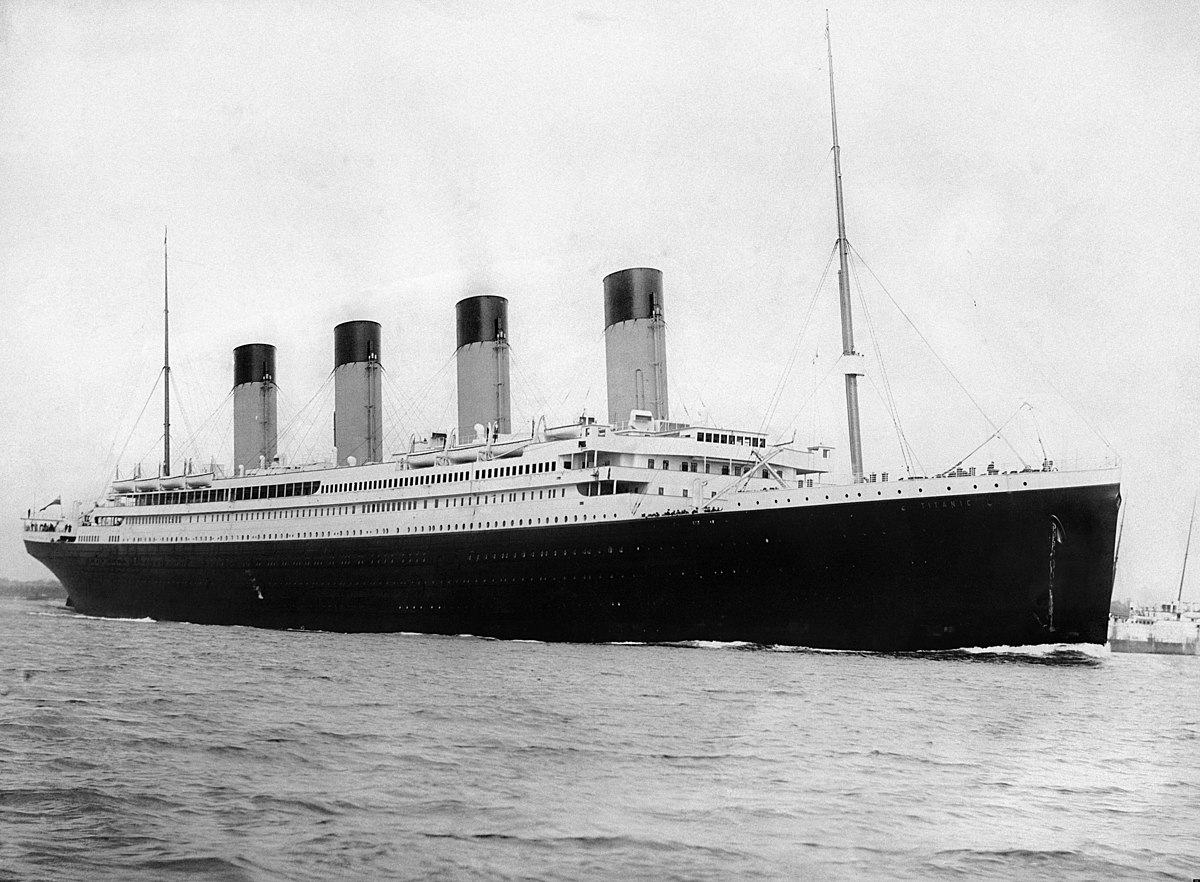

Picture from Wikipedia

# Know your data



In [2]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the data and get some basic stats on it**

In [3]:
# load the data
dat_train = pd.read_csv('../input/titanic/train.csv')
dat_test = pd.read_csv('../input/titanic/test.csv')

In [4]:
dat_train.info()
dat_train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Van der hoef, Mr. Wyckoff",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
dat_test.info()
dat_test.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Lundin, Miss. Olga Elida",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [6]:
dat_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C


In [7]:
dat_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
355,1247,1,"Julian, Mr. Henry Forbes",male,50.0,0,0,113044,26.0000,E60,S
401,1293,2,"Gale, Mr. Harry",male,38.0,1,0,28664,21.0000,NaN,S
130,1022,3,"Spinner, Mr. Henry John",male,32.0,0,0,STON/OQ. 369943,8.0500,NaN,S
283,1175,3,"Touma, Miss. Maria Youssef",female,9.0,1,1,2650,15.2458,NaN,C
149,1041,2,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.0000,NaN,S


**Combine the train and test data sets to help fill in null values**

In [8]:
dat_all = dat_train.copy()
dat_all.drop('Survived',axis=1,inplace=True)
dat_all['Source']='Train'
dat_all.info()

dat_all = pd.concat([dat_all, dat_test], ignore_index=True)
dat_all['Source'].fillna('Test',inplace=True)
dat_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Source       891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass

In [9]:
dat_all.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,1309
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,2
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,Train
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,891
mean,655.000000,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN
std,378.020061,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,328.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,655.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,982.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN


**Split Name to help extract useful features**

In [10]:
# split name into title, first and last names
dat_all[['LastName','FirstName']]= dat_all['Name'].str.split(',',expand=True)

In [11]:
dat_all[['Salutation','FirstName']]= dat_all['FirstName'].str.split('.', 1, expand=True)

In [12]:
dat_all.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source,LastName,FirstName,Salutation
249,250,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S,Train,Carter,Ernest Courtenay,Rev
1017,1018,3,"Brobeck, Mr. Karl Rudolf",male,22.0,0,0,350045,7.7958,NaN,S,Test,Brobeck,Karl Rudolf,Mr
243,244,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S,Train,Maenpaa,Matti Alexanteri,Mr
223,224,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S,Train,Nenkoff,Christo,Mr
893,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Test,Myles,Thomas Francis,Mr


In [13]:
lsal = dat_all.Salutation.unique()
print(lsal)

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer' ' Dona']


In [14]:
Saldict = {}
for l in lsal:
    if l.strip() in ['Lady','Sir','the Countess']:
        Saldict[l] = "Royalty"
    if l.strip() in ['Capt','Col','Major','Dr','Rev']:
        Saldict[l] = "Services"
    if l.strip() in ['Miss','Master','Don','Dona','Jonkheer','Mlle','Mme','Mr','Ms','Mrs']:
        Saldict[l] = "Others"

print(Saldict)

{' Mr': 'Others', ' Mrs': 'Others', ' Miss': 'Others', ' Master': 'Others', ' Don': 'Others', ' Rev': 'Services', ' Dr': 'Services', ' Mme': 'Others', ' Ms': 'Others', ' Major': 'Services', ' Lady': 'Royalty', ' Sir': 'Royalty', ' Mlle': 'Others', ' Col': 'Services', ' Capt': 'Services', ' the Countess': 'Royalty', ' Jonkheer': 'Others', ' Dona': 'Others'}


In [15]:
dat_all['SubCategory'] = dat_all['Salutation'].apply(lambda x: Saldict[x])

In [16]:
dat_all.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source,LastName,FirstName,Salutation,SubCategory
638,639,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S,Train,Panula,Juha (Maria Emilia Ojala),Mrs,Others
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train,Futrelle,Jacques Heath (Lily May Peel),Mrs,Others
603,604,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,NaN,S,Train,Torber,Ernst William,Mr,Others
1159,1160,3,"Howard, Miss. May Elizabeth",female,NaN,0,0,A. 2. 39186,8.0500,NaN,S,Test,Howard,May Elizabeth,Miss,Others
1274,1275,3,"McNamee, Mrs. Neal (Eileen O'Leary)",female,19.0,1,0,376566,16.1000,NaN,S,Test,McNamee,Neal (Eileen O'Leary),Mrs,Others


**Identify the rows with null Fare**

In [17]:
dat_all[dat_all['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source,LastName,FirstName,Salutation,SubCategory
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Test,Storey,Thomas,Mr,Others


In [18]:
dat_all.groupby(['Pclass']).Fare.agg(np.median)

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [19]:
dat_all['Fare'].fillna(dat_all.groupby(['Pclass']).Fare.agg(np.median)[3], inplace=True)

In [20]:
dat_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Source       1309 non-null   object 
 12  LastName     1309 non-null   object 
 13  FirstName    1309 non-null   object 
 14  Salutation   1309 non-null   object 
 15  SubCategory  1309 non-null   object 
dtypes: float64(2), int64(4), object(10)
memory usage: 163.8+ KB


**Identify rows with null Age**

In [21]:
print(dat_all[dat_all.Age.isnull()].Salutation.unique())
dat_all.Age = dat_all.groupby(['Salutation']).Age.apply(lambda x: x.fillna(x.median()))
dat_all.info()

[' Mr' ' Mrs' ' Miss' ' Master' ' Dr' ' Ms']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Source       1309 non-null   object 
 12  LastName     1309 non-null   object 
 13  FirstName    1309 non-null   object 
 14  Salutation   1309 non-null   object 
 15  SubCategory  1309 non-null   object 
dtypes: float64(2), int64(4), object(10)
memory usage: 163.8+ KB


**Identify rows with null Embarked**

In [22]:
dat_all[dat_all['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source,LastName,FirstName,Salutation,SubCategory
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Train,Icard,Amelie,Miss,Others
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Train,Stone,George Nelson (Martha Evelyn),Mrs,Others


Notes on the Titanic mentions Icard to have been the personal maid to Mrs. Stone - as is validated by the first class cabin being shared between the two. They embarked at Southhampton.

In [23]:
dat_all.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
dat_all.Embarked.fillna('S',inplace=True)
dat_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
 11  Source       1309 non-null   object 
 12  LastName     1309 non-null   object 
 13  FirstName    1309 non-null   object 
 14  Salutation   1309 non-null   object 
 15  SubCategory  1309 non-null   object 
dtypes: float64(2), int64(4), object(10)
memory usage: 163.8+ KB


**Identify rows with null Cabin**

In [25]:
temp = dat_all[dat_all['Cabin'].isnull()]
temp.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source,LastName,FirstName,Salutation,SubCategory
287,288,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S,Train,Naidenoff,Penko,Mr,Others
521,522,3,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S,Train,Vovk,Janko,Mr,Others
81,82,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S,Train,Sheerlinck,Jan Baptist,Mr,Others
1039,1040,1,"Crafton, Mr. John Bertram",male,29.0,0,0,113791,26.5500,NaN,S,Test,Crafton,John Bertram,Mr,Others
573,574,3,"Kelly, Miss. Mary",female,22.0,0,0,14312,7.7500,NaN,Q,Train,Kelly,Mary,Miss,Others
729,730,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,STON/O2. 3101271,7.9250,NaN,S,Train,Ilmakangas,Pieta Sofia,Miss,Others
140,141,3,"Boulos, Mrs. Joseph (Sultana)",female,35.5,0,2,2678,15.2458,NaN,C,Train,Boulos,Joseph (Sultana),Mrs,Others
184,185,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S,Train,Kink-Heilmann,Luise Gretchen,Miss,Others
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,Braund,Owen Harris,Mr,Others
381,382,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C,Train,Nakid,"Maria (""Mary"")",Miss,Others


In [26]:
dat_all[dat_all.LastName.str.contains('Nakid')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source,LastName,FirstName,Salutation,SubCategory
381,382,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C,Train,Nakid,"Maria (""Mary"")",Miss,Others
622,623,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.7417,NaN,C,Train,Nakid,Sahid,Mr,Others
1224,1225,3,"Nakid, Mrs. Said (Waika Mary"" Mowad)""",female,19.0,1,1,2653,15.7417,NaN,C,Test,Nakid,"Said (Waika Mary"" Mowad)""",Mrs,Others


In [27]:
dat_all.Cabin.fillna('?000',inplace=True)
dat_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Source       1309 non-null   object 
 12  LastName     1309 non-null   object 
 13  FirstName    1309 non-null   object 
 14  Salutation   1309 non-null   object 
 15  SubCategory  1309 non-null   object 
dtypes: float64(2), int64(4), object(10)
memory usage: 163.8+ KB


In [28]:
# pp.ProfileReport(dat_train)

In [29]:
dat_all['CabinL'] = dat_all.Cabin.map(lambda x: x[0])
dat_all['CabinCode'] = dat_all.Cabin.map(lambda x: x[1:])
dat_all.CabinL.unique()

array(['?', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [30]:
dat_all.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source,LastName,FirstName,Salutation,SubCategory,CabinL,CabinCode
884,885,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,?000,S,Train,Sutehall,Henry Jr,Mr,Others,?,000
1098,1099,2,"Collett, Mr. Sidney C Stuart",male,24.0,0,0,28034,10.5000,?000,S,Test,Collett,Sidney C Stuart,Mr,Others,?,000
1111,1112,2,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,?000,C,Test,Duran y More,Florentina,Miss,Others,?,000
635,636,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,?000,S,Train,Davis,Mary,Miss,Others,?,000
770,771,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,?000,S,Train,Lievens,Rene Aime,Mr,Others,?,000


In [31]:
dat_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Source       1309 non-null   object 
 12  LastName     1309 non-null   object 
 13  FirstName    1309 non-null   object 
 14  Salutation   1309 non-null   object 
 15  SubCategory  1309 non-null   object 
 16  CabinL       1309 non-null   object 
 17  CabinCode    1309 non-null   object 
dtypes: float64(2), int64(4), object(12)
memory usage

In [32]:
dat_all['FamilySize'] = dat_all['SibSp']+dat_all['Parch']+1

In [33]:
dat_all.Pclass = dat_all.Pclass.astype('category')
for col in dat_all.columns:
    if dat_all[col].dtype == 'object':
        dat_all[col] = dat_all[col].astype('category')   
    
dat_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Pclass       1309 non-null   category
 2   Name         1309 non-null   category
 3   Sex          1309 non-null   category
 4   Age          1309 non-null   float64 
 5   SibSp        1309 non-null   int64   
 6   Parch        1309 non-null   int64   
 7   Ticket       1309 non-null   category
 8   Fare         1309 non-null   float64 
 9   Cabin        1309 non-null   category
 10  Embarked     1309 non-null   category
 11  Source       1309 non-null   category
 12  LastName     1309 non-null   category
 13  FirstName    1309 non-null   category
 14  Salutation   1309 non-null   category
 15  SubCategory  1309 non-null   category
 16  CabinL       1309 non-null   category
 17  CabinCode    1309 non-null   category
 18  FamilySize   1309 non-null  

# Preprocessing the data

In [34]:
df_train = dat_all[dat_all.Source == "Train"].copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Pclass       891 non-null    category
 2   Name         891 non-null    category
 3   Sex          891 non-null    category
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    category
 8   Fare         891 non-null    float64 
 9   Cabin        891 non-null    category
 10  Embarked     891 non-null    category
 11  Source       891 non-null    category
 12  LastName     891 non-null    category
 13  FirstName    891 non-null    category
 14  Salutation   891 non-null    category
 15  SubCategory  891 non-null    category
 16  CabinL       891 non-null    category
 17  CabinCode    891 non-null    category
 18  FamilySize   891 non-null    i

In [35]:
df_test = dat_all[dat_all.Source == "Test"].copy()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    category
 3   Sex          418 non-null    category
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    category
 8   Fare         418 non-null    float64 
 9   Cabin        418 non-null    category
 10  Embarked     418 non-null    category
 11  Source       418 non-null    category
 12  LastName     418 non-null    category
 13  FirstName    418 non-null    category
 14  Salutation   418 non-null    category
 15  SubCategory  418 non-null    category
 16  CabinL       418 non-null    category
 17  CabinCode    418 non-null    category
 18  FamilySize   418 non-null  

In [36]:
# drop Ticket (high cardinality) and Cabin (high % missing) and Name (irrelevant)
features = ['Pclass','Sex','Age','FamilySize','Fare','Embarked','SubCategory','CabinL']
col2drop = list(set(df_train.columns)-set(features))
print(col2drop)
target = 'Survived'

['SibSp', 'FirstName', 'Salutation', 'Parch', 'LastName', 'Name', 'PassengerId', 'Cabin', 'Ticket', 'CabinCode', 'Source']


In [37]:
for col in features:
    if df_train[col].dtype not in [np.int, np.float]:
        print(col,':',len(df_train[col].unique()))

Pclass : 3
Sex : 2
Embarked : 3
SubCategory : 3
CabinL : 9


In [38]:
# trim training data to include relevant columns
y_train = dat_train[target]
X_train = df_train[features].copy()
print(X_train.info())

X_test = df_test[features].copy()
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       891 non-null    category
 1   Sex          891 non-null    category
 2   Age          891 non-null    float64 
 3   FamilySize   891 non-null    int64   
 4   Fare         891 non-null    float64 
 5   Embarked     891 non-null    category
 6   SubCategory  891 non-null    category
 7   CabinL       891 non-null    category
dtypes: category(5), float64(2), int64(1)
memory usage: 33.1 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       418 non-null    category
 1   Sex          418 non-null    category
 2   Age          418 non-null    float64 
 3   FamilySize   418 non-null    int64   
 4   Fare         418 non-null  

In [39]:
print(features)

['Pclass', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked', 'SubCategory', 'CabinL']


In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

cat_feat = ['Pclass','Sex','Embarked','SubCategory','CabinL']
flt_feat = ['Fare','Age']
num_feat = list(set(features)-set(cat_feat)-set(flt_feat))

np.random.seed(0)
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train,y_train,test_size=0.2,random_state=0)

prect = ColumnTransformer([('OH',OneHotEncoder(),cat_feat),('stdsc',StandardScaler(),flt_feat)], remainder='passthrough')
X_train_ct = prect.fit_transform(X_tr)
X_valid_ct = prect.transform(X_valid)
X_test_ct = prect.transform(X_test)

print(X_train_ct.shape)
print(X_valid_ct.shape)
print(X_test_ct.shape)

(712, 23)
(179, 23)
(418, 23)


# Checking distributions across train and test data

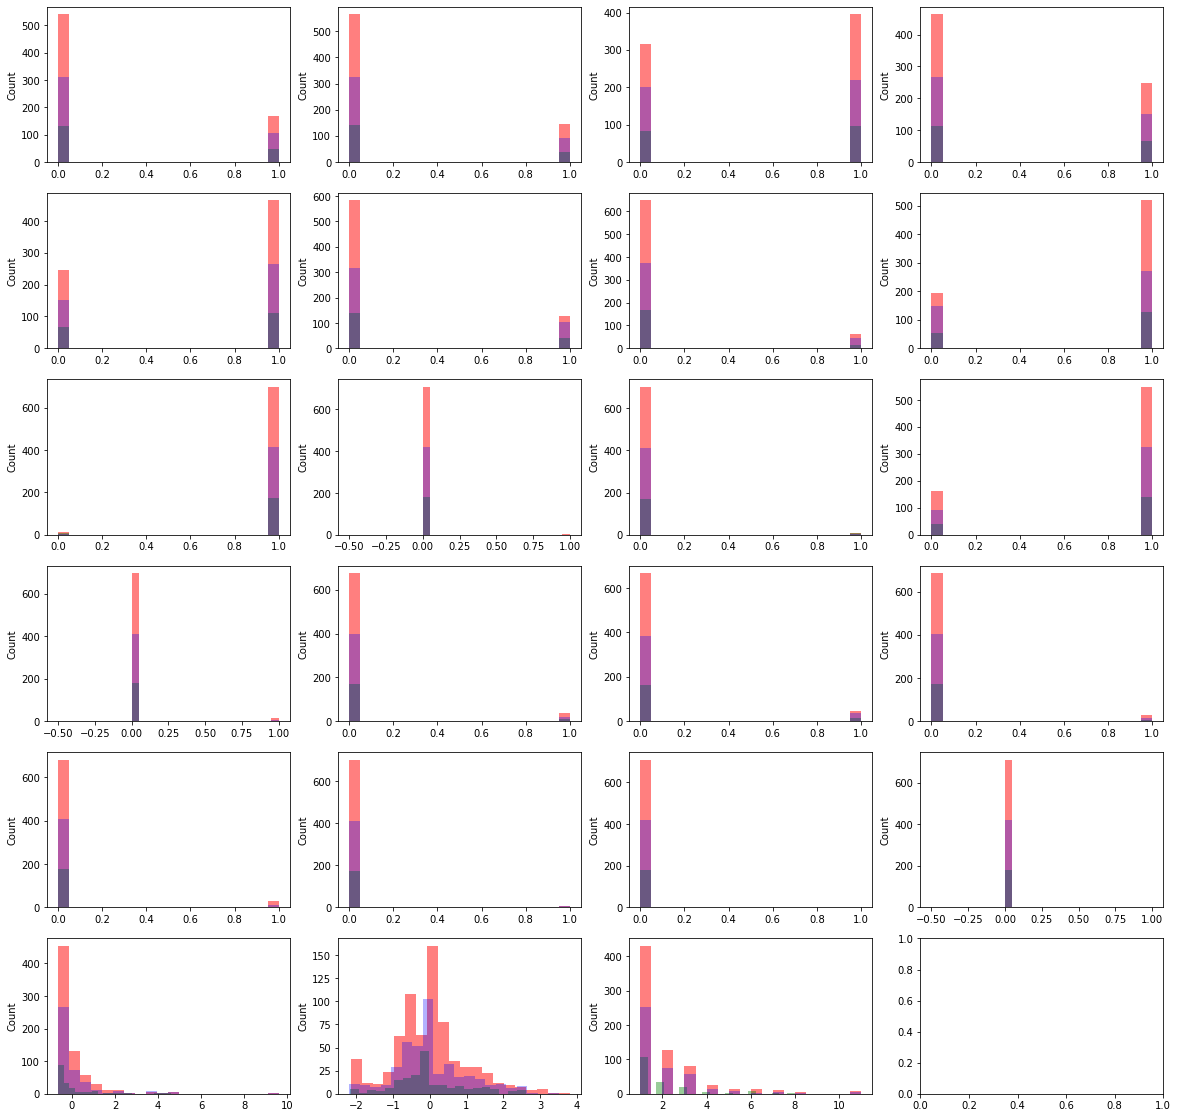

In [41]:
fig, axs = plt.subplots(6,4, figsize=(20,20))
for i in range(X_train_ct.shape[1]):
    r,c = divmod(i,4)
    sns.histplot(X_train_ct[:,i],bins=20,ax=axs[r,c],color='red',alpha=0.5,linewidth=0)
    sns.histplot(X_valid_ct[:,i],bins=20,ax=axs[r,c],color='green',alpha=0.4,linewidth=0)
    sns.histplot(X_test_ct[:,i],bins=20,ax=axs[r,c],color='blue',alpha=0.3,linewidth=0)


# Build functions

In [42]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve


from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [43]:
def model_fit_summarize(model):
    model.fit(X_train_ct, y_tr)
    y = model.predict(X_valid_ct)

    confmat = confusion_matrix(y_valid,y)
    acc = accuracy_score(y_valid, y)*100
    pre = precision_score(y_valid, y)*100
    rec = recall_score(y_valid, y)*100
    roc_auc = roc_auc_score(y_valid, y)*100

#     print('Confusion Matrix :\n',confmat)
    print('Accuracy score : {:.2f} %'.format(acc))
    print('Precision score : {:.2f} %'.format(pre))
    print('Recall score : {:.2f} %'.format(rec))
    print('ROC_AUC score : {:.2f} %'.format(roc_auc))
    
    print('\nClassification report :\n', classification_report(y_valid, y))

    plot_roc_curve(model, X_valid_ct, y_valid)
    plot_precision_recall_curve(model, X_valid_ct, y_valid)
    plot_confusion_matrix(model, X_valid_ct, y_valid)
    
    return acc, pre, rec, roc_auc

# Model

Accuracy score : 82.68 %
Precision score : 78.79 %
Recall score : 75.36 %
ROC_AUC score : 81.32 %

Classification report :
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



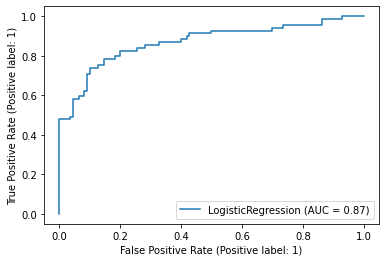

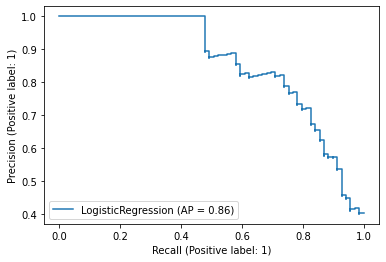

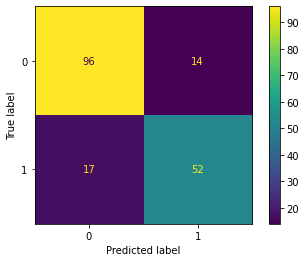

In [44]:
lr = LogisticRegression(solver='liblinear',random_state=0)
a,b,c,d = model_fit_summarize(lr)
summary = pd.DataFrame([a,b,c,d],index=['Accuracy','Precision','Recall','ROC_AUC'],columns=['LogisticRegression'])

Accuracy score : 83.24 %
Precision score : 83.05 %
Recall score : 71.01 %
ROC_AUC score : 80.96 %

Classification report :
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.71      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



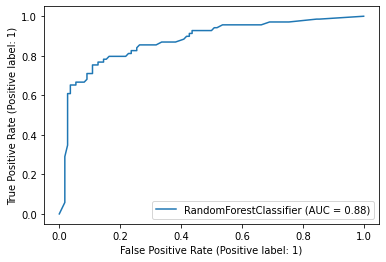

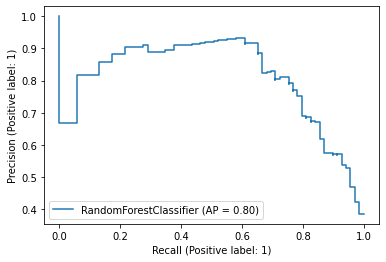

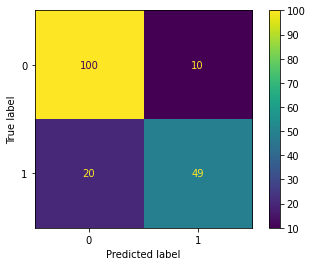

In [45]:
rf = RandomForestClassifier(random_state=0)
a,b,c,d = model_fit_summarize(rf)
summary['RandomForest']=[a,b,c,d]

Accuracy score : 82.68 %
Precision score : 85.19 %
Recall score : 66.67 %
ROC_AUC score : 79.70 %

Classification report :
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       110
           1       0.85      0.67      0.75        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



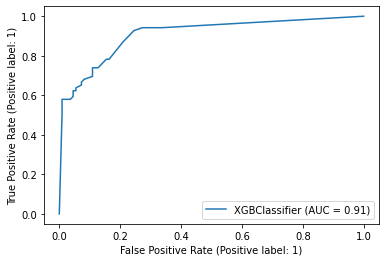

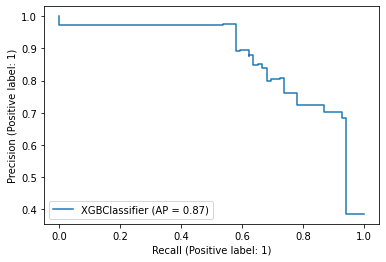

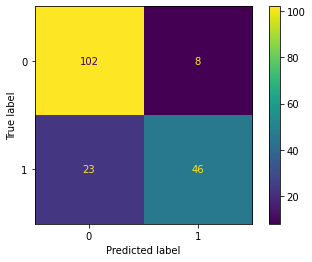

In [46]:
xg = XGBClassifier(random_state=0, n_estimators=25, learning_rate=0.01,use_label_encoder=False,eval_metric='logloss')
a,b,c,d = model_fit_summarize(xg)
summary['XGBoost']=[a,b,c,d]

Accuracy score : 75.42 %
Precision score : 77.78 %
Recall score : 50.72 %
ROC_AUC score : 70.82 %

Classification report :
               precision    recall  f1-score   support

           0       0.75      0.91      0.82       110
           1       0.78      0.51      0.61        69

    accuracy                           0.75       179
   macro avg       0.76      0.71      0.72       179
weighted avg       0.76      0.75      0.74       179



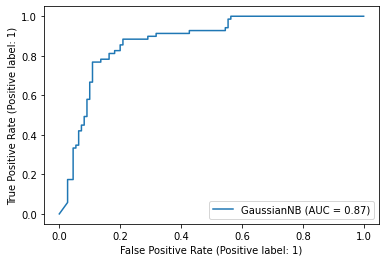

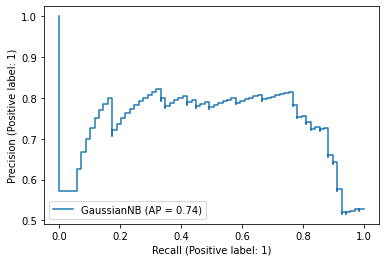

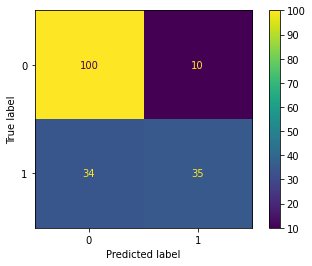

In [47]:
nb = GaussianNB()
a,b,c,d = model_fit_summarize(nb)
summary['NaiveBayes']=[a,b,c,d]

In [48]:
pd.set_option('precision',1)
print(summary)

           LogisticRegression  RandomForest  XGBoost  NaiveBayes
Accuracy                 82.7          83.2     82.7        75.4
Precision                78.8          83.1     85.2        77.8
Recall                   75.4          71.0     66.7        50.7
ROC_AUC                  81.3          81.0     79.7        70.8


**Hyperparameter tuning on Random Forest**

In [49]:
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# from sklearn.model_selection import RandomizedSearchCV
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
#                                n_iter = 100, cv = 5, verbose=2, random_state=0, n_jobs = -1)
# rf_random.fit(X_train_ct, y_tr)

# print("Best Params:",rf_random.best_params_)
# print("Best Estimator", rf_random.best_estimator_)

From grid search cv ...

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Params: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}

Best Estimator RandomForestClassifier(max_depth=70, min_samples_leaf=2, n_estimators=1000,
                       random_state=0)

Accuracy score : 83.24 %
Precision score : 88.24 %
Recall score : 65.22 %
ROC_AUC score : 79.88 %

Classification report :
               precision    recall  f1-score   support

           0       0.81      0.95      0.87       110
           1       0.88      0.65      0.75        69

    accuracy                           0.83       179
   macro avg       0.85      0.80      0.81       179
weighted avg       0.84      0.83      0.83       179



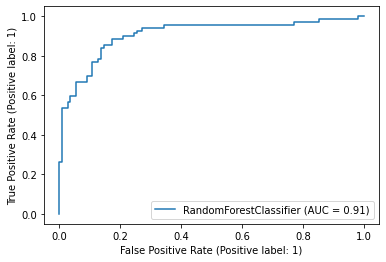

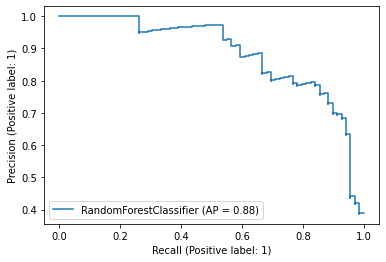

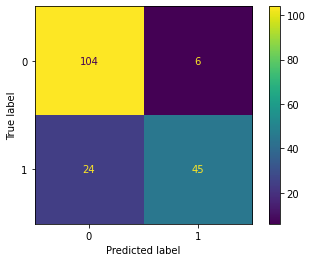

In [50]:
rf_tuned = RandomForestClassifier(bootstrap=False,max_depth=100, min_samples_leaf=4, min_samples_split=2,
                                  n_estimators=1400, random_state=0, max_features='sqrt')
a,b,c,d = model_fit_summarize(rf_tuned)
summary['TunedRF']=[a,b,c,d]

In [51]:
predtest = rf_tuned.predict(X_test_ct)

In [52]:
# Save test predictions to file
output = pd.DataFrame({'PassengerId': dat_test.PassengerId,
                       'Survived': predtest})
output.to_csv('submission.csv', index=False)